In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os
fnames = []
fpaths = []
for dirname, _, filenames in os.walk('/Users/nickf/OneDrive/Desktop/FormulaOne/'):
    for filename in filenames:
        fnames.append(filename.split('.')[0])
        fpaths.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

/Users/nickf/OneDrive/Desktop/FormulaOne/circuits.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/constructors.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/constructor_results.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/constructor_standings.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/drivers.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/driver_standings.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/lap_times.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/pit_stops.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/qualifying.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/races.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/results.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/seasons.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/sprint_results.csv
/Users/nickf/OneDrive/Desktop/FormulaOne/status.csv


In [5]:
# Read data
fpath = '/Users/nickf/OneDrive/Desktop/FormulaOne/'
circuits = pd.read_csv(f'{fpath}circuits.csv', index_col=0, na_values=r'\N')
constructorResults = pd.read_csv(f'{fpath}constructor_results.csv', index_col=0, na_values=r'\N')
constructors = pd.read_csv(f'{fpath}constructors.csv', index_col=0, na_values=r'\N')
constructorStandings = pd.read_csv(f'{fpath}constructor_standings.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv(f'{fpath}drivers.csv', index_col=0, na_values=r'\N')
driverStandings = pd.read_csv(f'{fpath}driver_standings.csv', index_col=0, na_values=r'\N')
lapTimes = pd.read_csv(f'{fpath}lap_times.csv')
pitStops = pd.read_csv(f'{fpath}pit_stops.csv')
qualifying = pd.read_csv(f'{fpath}qualifying.csv', index_col=0, na_values=r'\N')
races = pd.read_csv(f'{fpath}races.csv', na_values=r'\N')
results = pd.read_csv(f'{fpath}results.csv', index_col=0, na_values=r'\N')
seasons = pd.read_csv(f'{fpath}seasons.csv', index_col=0, na_values=r'\N')
status = pd.read_csv(f'{fpath}status.csv', index_col=0, na_values=r'\N')

# Post-reading formatting 
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
# races.index = races.index.set_names(['raceId','year','round','circuitId','raceName','date','time','raceUrl','a','b'])
# races = races[[]].reset_index()[['raceId','year','round','circuitId','raceName','date','time','raceUrl']]
races.set_index('raceId',inplace=True)
races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
pitStops = pitStops.rename(columns={'time':'pitTime'})
pitStops['seconds'] = pitStops['milliseconds'].apply(lambda x: x/1000)
results['seconds'] = results['milliseconds'].apply(lambda x: x/1000)

In [6]:
# Constructor color mapping
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

In [7]:
pitStops

,raceId,driverId,stop,lap,pitTime,duration,milliseconds,seconds
0,841,153,1,1,17:05:23,26.898,26898,26.898
1,841,30,1,1,17:05:52,25.021,25021,25.021
2,841,17,1,11,17:20:48,23.426,23426,23.426
3,841,4,1,12,17:22:34,23.251,23251,23.251
4,841,13,1,13,17:24:10,23.842,23842,23.842
...,...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798,23.798
10085,1110,830,2,30,16:00:16,23.012,23012,23.012
10086,1110,848,3,33,16:07:06,23.529,23529,23.529
10087,1110,858,3,34,16:09:09,23.109,23109,23.109


In [8]:
pitStops.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,10089.0,962.774011,81.144375,841.000,888.000,958.00,1035.000,1110.000
driverId,10089.0,523.998910,389.698555,1.000,18.000,815.00,831.000,858.000
stop,10089.0,1.759738,0.916282,1.000,1.000,2.00,2.000,6.000
lap,10089.0,25.312023,14.729775,1.000,13.000,25.00,36.000,78.000
milliseconds,10089.0,75348.633363,278858.845817,12897.000,21914.000,23570.00,26202.000,3069017.000
seconds,10089.0,75.348633,278.858846,12.897,21.914,23.57,26.202,3069.017


In [9]:
newResults = pd.merge(results,races,left_on='raceId',right_index=True,how='left')
newResults = pd.merge(newResults,circuits,left_on='circuitId',right_index=True,how='left')
newResults = pd.merge(newResults,constructors,left_on='constructorId',right_index=True,how='left')
newResults = pd.merge(newResults,drivers,left_on='driverId',right_index=True,how='left')
newResults

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,constructorUrl,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
resultId,,,,,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,...,http://en.wikipedia.org/wiki/McLaren,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
2,18,2,2,3.0,5,2.0,2,2,8.0,58,...,http://en.wikipedia.org/wiki/BMW_Sauber,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
3,18,3,3,7.0,7,3.0,3,3,6.0,58,...,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
4,18,4,4,5.0,11,4.0,4,4,5.0,58,...,http://en.wikipedia.org/wiki/Renault_in_Formul...,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
5,18,5,1,23.0,3,5.0,5,5,4.0,58,...,http://en.wikipedia.org/wiki/McLaren,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26081,1110,817,213,3.0,19,16.0,16,16,0.0,44,...,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,ricciardo,3.0,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo,Daniel Ricciardo
26082,1110,858,3,2.0,18,17.0,17,17,0.0,44,...,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,sargeant,2.0,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,Logan Sargeant
26083,1110,807,210,27.0,0,18.0,18,18,0.0,44,...,http://en.wikipedia.org/wiki/Haas_F1_Team,hulkenberg,27.0,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,Nico Hülkenberg


In [10]:
newPitStops = pd.merge(pitStops,races,left_on='raceId',right_index=True,how='left')
newPitStops = pd.merge(newPitStops,circuits,left_on='circuitId',right_index=True,how='left')
newPitStops = pd.merge(newPitStops,newResults[['raceId','driverId','driverName','constructorId','constructorName']],left_on=['raceId','driverId'],right_on=['raceId','driverId'])
newPitStops

,raceId,driverId,stop,lap,pitTime,duration,milliseconds,seconds,year,round,...,circuitName,circuitLocation,circuitCountry,lat,lng,alt,circuitUrl,driverName,constructorId,constructorName
0,841,153,1,1,17:05:23,26.898,26898,26.898,2011,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jaime Alguersuari,5,Toro Rosso
1,841,153,2,17,17:31:06,24.463,24463,24.463,2011,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jaime Alguersuari,5,Toro Rosso
2,841,153,3,35,17:59:45,26.348,26348,26.348,2011,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jaime Alguersuari,5,Toro Rosso
3,841,30,1,1,17:05:52,25.021,25021,25.021,2011,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Michael Schumacher,131,Mercedes
4,841,30,2,17,17:32:08,23.988,23988,23.988,2011,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Michael Schumacher,131,Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,1110,830,1,14,15:30:04,22.887,22887,22.887,2023,12,...,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,Max Verstappen,9,Red Bull
10085,1110,830,2,30,16:00:16,23.012,23012,23.012,2023,12,...,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,Max Verstappen,9,Red Bull
10086,1110,840,1,20,15:42:12,25.397,25397,25.397,2023,12,...,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,Lance Stroll,117,Aston Martin
10087,1110,847,1,22,15:46:00,23.837,23837,23.837,2023,12,...,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,George Russell,131,Mercedes


In [11]:
raceResults = pd.merge(newResults,newPitStops.groupby(by=['raceId','name','constructorName','driverId','driverName']).sum(),left_on=['raceId','driverId'],right_on=['raceId','driverId'],how='left')
raceResults['pitPercentage'] = raceResults['milliseconds_y']/raceResults['milliseconds_x']*100
raceResults

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2770909341.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raceResults = pd.merge(newResults,newPitStops.groupby(by=['raceId','name','constructorName','driverId','driverName']).sum(),left_on=['raceId','driverId'],right_on=['raceId','driverId'],how='left')


,raceId,driverId,constructorId_x,number_x,grid,position,positionText,positionOrder,points,laps,...,milliseconds_y,seconds_y,year_y,round_y,circuitId_y,lat_y,lng_y,alt_y,constructorId_y,pitPercentage
0,18,1,1,22.0,1,1.0,1,1,10.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,2,2,3.0,5,2.0,2,2,8.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,3,3,7.0,7,3.0,3,3,6.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,4,4,5.0,11,4.0,4,4,5.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,5,1,23.0,3,5.0,5,5,4.0,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,817,213,3.0,19,16.0,16,16,0.0,44,...,46133.0,46.133,4046.0,24.0,26.0,100.8744,11.94278,802.0,426.0,0.912888
26076,1110,858,3,2.0,18,17.0,17,17,0.0,44,...,70617.0,70.617,6069.0,36.0,39.0,151.3116,17.91417,1203.0,9.0,1.396994
26077,1110,807,210,27.0,0,18.0,18,18,0.0,44,...,49809.0,49.809,4046.0,24.0,26.0,100.8744,11.94278,802.0,420.0,0.984193
26078,1110,832,6,55.0,4,NaN,R,19,0.0,23,...,23303.0,23.303,2023.0,12.0,13.0,50.4372,5.97139,401.0,6.0,NaN


In [12]:
Pitstop_data = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:20].keys().tolist(),:]['constructorName'].unique()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\4050137643.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Pitstop_data = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:20].keys().tolist(),:]['constructorName'].unique()


In [13]:
len(Pitstop_data)

10

In [14]:
Pitstop_data_race = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:10].keys().tolist(),:]['circuitName'].unique()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\562297121.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Pitstop_data_race = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:10].keys().tolist(),:]['circuitName'].unique()


In [15]:
newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:20].keys().tolist(),:]['seconds']

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\1443743446.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:20].keys().tolist(),:]['seconds']


1052    12.897
1016    12.959
651     13.173
633     13.186
1640    13.199
680     13.201
1658    13.206
1390    13.259
2333    13.266
1365    13.335
144     13.900
697     13.914
218     13.925
701     13.968
9344    13.973
1272    13.981
954     13.984
1869    13.986
9388    14.008
1060    14.029
Name: seconds, dtype: float64

In [16]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [17]:
Threshold = newPitStops['seconds'].sort_values(ascending= True)[:100].quantile(0.10)

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\1079258057.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Threshold = newPitStops['seconds'].sort_values(ascending= True)[:100].quantile(0.10)


In [18]:

headings = ['circuitName','circuitLocation','circuitCountry']
l1=newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitName'][newPitStops['seconds']<Threshold].unique()
l2=newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitLocation'][newPitStops['seconds']<Threshold].unique()
l3=newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitCountry'][newPitStops['seconds']<Threshold].unique()
circuit_dict = {'circuitName': l1, 'circuitLocation': l2,'circuitCountry': l3}

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\1099050196.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  l1=newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitName'][newPitStops['seconds']<Threshold].unique()
C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\1099050196.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  l2=newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circu

In [19]:
Circuit_values = pd.DataFrame.from_dict(circuit_dict)
Circuit_values

,circuitName,circuitLocation,circuitCountry
0,Yas Marina Circuit,Abu Dhabi,UAE
1,Hungaroring,Budapest,Hungary
2,Circuit de Barcelona-Catalunya,Montmeló,Spain


In [20]:
c_headings = ['constructorId','constructorName']
c1 = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorName'][newPitStops['seconds']<Threshold].unique()
c2 = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorId'][newPitStops['seconds']<Threshold].unique()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2130211849.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  c1 = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorName'][newPitStops['seconds']<Threshold].unique()
C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2130211849.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  c2 = newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:

In [21]:
c_dict = {'constructorId': c1, 'constructorName': c2}
construct_values = pd.DataFrame.from_dict(c_dict)
construct_values

,constructorId,constructorName
0,Williams,3
1,Renault,4
2,McLaren,1
3,Mercedes,131
4,Sauber,15
5,Ferrari,6
6,Red Bull,9


In [22]:
from tabulate import tabulate
print(tabulate(c_dict, headers='keys',tablefmt='fancy_grid'))

╒═════════════════╤═══════════════════╕
│ constructorId   │   constructorName │
╞═════════════════╪═══════════════════╡
│ Williams        │                 3 │
├─────────────────┼───────────────────┤
│ Renault         │                 4 │
├─────────────────┼───────────────────┤
│ McLaren         │                 1 │
├─────────────────┼───────────────────┤
│ Mercedes        │               131 │
├─────────────────┼───────────────────┤
│ Sauber          │                15 │
├─────────────────┼───────────────────┤
│ Ferrari         │                 6 │
├─────────────────┼───────────────────┤
│ Red Bull        │                 9 │
╘═════════════════╧═══════════════════╛


C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2075282185.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(len(newPitStops['seconds'][:500])),newPitStops['seconds'].sort_values(ascending= True)[:500])
C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2075282185.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.axhline(y=newPitStops['seconds'].sort_values(ascending= True)[:500].quantile(0.10))


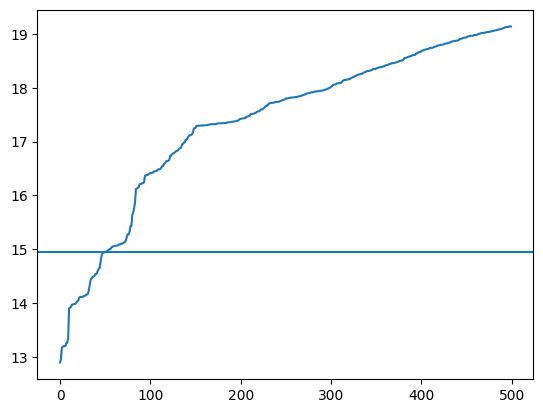

In [23]:
plt.plot(np.arange(len(newPitStops['seconds'][:500])),newPitStops['seconds'].sort_values(ascending= True)[:500])
plt.axhline(y=newPitStops['seconds'].sort_values(ascending= True)[:500].quantile(0.10))

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2149103945.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  constlist.append(len(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['constructorName'].unique()))
C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2149103945.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  arraylist.append(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['seco

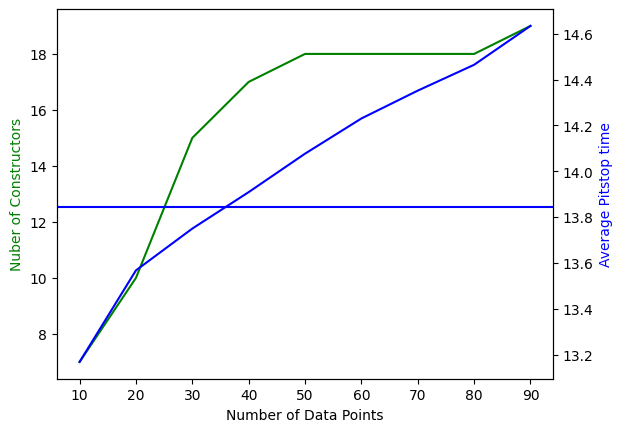

In [24]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

constlist = []
for i in np.arange(10,100,10):
    constlist.append(len(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['constructorName'].unique()))
ax1.plot(np.arange(10,100,10),constlist,color = 'g')



arraylist = []
for i in np.arange(10,100,10):
    arraylist.append(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['seconds'].mean())
ax2.plot(np.arange(10,100,10),arraylist,color = 'Blue')

ax1.set_xlabel('Number of Data Points')
ax1.set_ylabel('Nuber of Constructors', color='g')
ax2.set_ylabel('Average Pitstop time', color='b')
# plt.axvline(x = newPitStops['seconds'].quantile(0.001), color = 'b', label = 'axvline - full height')
ax2.axhline(y=Threshold,color= 'b')
plt.savefig('Constructor Selection')


C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2350771018.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  arraylist.append(len(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['circuitName'].unique()))
C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2350771018.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  arraylist.append(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['seconds'

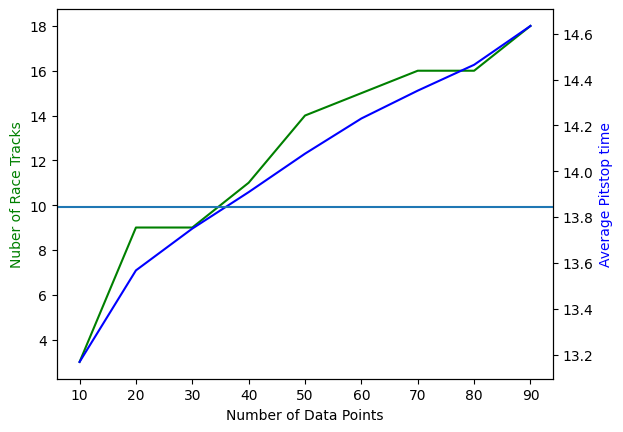

In [25]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

arraylist = []
for i in np.arange(10,100,10):
    arraylist.append(len(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['circuitName'].unique()))
ax1.plot(np.arange(10,100,10),arraylist,color = 'g')



arraylist = []
for i in np.arange(10,100,10):
    arraylist.append(newPitStops.iloc[newPitStops['seconds'].sort_values(ascending= True)[:i].keys().tolist(),:]['seconds'].mean())
ax2.plot(np.arange(10,100,10),arraylist,color = 'Blue')
ax2.axhline(y=Threshold)
ax1.set_xlabel('Number of Data Points')
ax1.set_ylabel('Nuber of Race Tracks', color='g')
ax2.set_ylabel('Average Pitstop time', color='b')
plt.savefig('Racetack Selection')

### Construct Pitstop data based on Circuits

In [26]:
Pitstop_newcircuits= newPitStops[newPitStops['circuitName'].isin(l1) & newPitStops['constructorName'].isin(c1)]

In [27]:
Pitstop_newcircuits[Pitstop_newcircuits['seconds']>50]['url']

4213    http://en.wikipedia.org/wiki/2015_Hungarian_Gr...
8417    http://en.wikipedia.org/wiki/2021_Hungarian_Gr...
8429    http://en.wikipedia.org/wiki/2021_Hungarian_Gr...
8439    http://en.wikipedia.org/wiki/2021_Hungarian_Gr...
8445    http://en.wikipedia.org/wiki/2021_Hungarian_Gr...
8451    http://en.wikipedia.org/wiki/2021_Hungarian_Gr...
8465    http://en.wikipedia.org/wiki/2021_Hungarian_Gr...
Name: url, dtype: object

In [28]:
pd.set_option('display.max_colwidth', None)
Pitstop_newcircuits[Pitstop_newcircuits['seconds']>50]

,raceId,driverId,stop,lap,pitTime,duration,milliseconds,seconds,year,round,...,circuitName,circuitLocation,circuitCountry,lat,lng,alt,circuitUrl,driverName,constructorId,constructorName
4213,936,8,5,52,15:27:47,59.555,59555,59.555,2015,10,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Kimi Räikkönen,6,Ferrari
8417,1062,830,2,2,15:08:31,24:16.349,1456349,1456.349,2021,11,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Max Verstappen,9,Red Bull
8429,1062,1,1,2,15:07:57,24:09.259,1449259,1449.259,2021,11,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Lewis Hamilton,131,Mercedes
8439,1062,832,1,2,15:08:04,24:12.527,1452527,1452.527,2021,11,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Carlos Sainz,6,Ferrari
8445,1062,849,1,2,15:08:10,24:14.435,1454435,1454.435,2021,11,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Nicholas Latifi,3,Williams
8451,1062,847,1,2,15:08:17,24:17.487,1457487,1457.487,2021,11,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,George Russell,3,Williams
8465,1062,817,1,2,15:08:28,24:17.127,1457127,1457.127,2021,11,...,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Daniel Ricciardo,1,McLaren


In [29]:
Pitstop_newcircuits.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'pitTime', 'duration',
       'milliseconds', 'seconds', 'year', 'round', 'circuitId', 'name', 'date',
       'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'circuitRef', 'circuitName', 'circuitLocation',
       'circuitCountry', 'lat', 'lng', 'alt', 'circuitUrl', 'driverName',
       'constructorId', 'constructorName'],
      dtype='object')

In [30]:
!pip install -U kaleido


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\nickf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
# xlim = [2018,2022]
import plotly.io as pio
fig = px.line(Pitstop_newcircuits.groupby(by=['year','constructorName']).mean().reset_index(),
                 x='year',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map
                 
                )
fig.update_layout(
    title_text='Average Pit Stop Durations by Constructor',
#      xaxis = dict(range = xlim)
)
fig.show()
# fig.write_image("images/AveragePitstop_new.png")
pio.write_image(fig, "fig.png")
# plt.savefig('AveragePitstop_new.png')

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\3872051674.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fig = px.line(Pitstop_newcircuits.groupby(by=['year','constructorName']).mean().reset_index(),


In [32]:
fig = px.scatter(Pitstop_newcircuits[Pitstop_newcircuits['seconds']<50],
                 x='date',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Durations over Time by Constructor',
)
fig.show()

In [33]:
fig = px.box(newPitStops[newPitStops['seconds']<50],
                 x='date',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Durations over Time by Constructor',
)
fig.show()

In [34]:
fig = px.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','name','date','constructorName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='constructorName',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Durations by Constructor from 2011 to date',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2450267498.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [35]:
year = 2023
fig = px.box(newPitStops[(newPitStops['seconds']<50)&(newPitStops['year']==year)].groupby(by=['raceId','name','date','constructorName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='constructorName',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text=f'Pit Stop Durations by Constructor for {year} Season',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\4123545430.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [36]:
fig = px.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','name','circuitName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='circuitName',
                 y='seconds',
                )
fig.update_layout(
    title_text='Pit Stop Durations by Race Circuit',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\832993496.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [37]:
fig = px.scatter(newPitStops[newPitStops['seconds']<50].groupby(by=['circuitName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='circuitName',
                 y='seconds',
                )
fig.update_layout(
    title_text='Average Race Pit Stop Durations by Circuit',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\1345748419.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [38]:
fig = px.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','name','circuitName','constructorName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='circuitName',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Average Race Pit Stop Durations by Race Circuit',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\401132628.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [39]:
newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','circuitName','driverId']).sum().groupby(by=['raceId','circuitName']).mean()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\2036569021.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,,stop,lap,milliseconds,seconds,year,round,circuitId,lat,lng,alt,constructorId
raceId,circuitName,,,,,,,,,,,
841,Albert Park Grand Prix Circuit,3.666667,51.047619,52163.190476,52.163190,4309.285714,2.142857,2.142857,-81.106500,310.645714,21.428571,82.380952
842,Sepang International Circuit,5.272727,68.818182,65528.545455,65.528545,5393.136364,5.363636,5.363636,7.404044,272.842818,48.272727,128.590909
843,Shanghai International Circuit,4.375000,62.625000,53889.833333,53.889833,4859.916667,7.250000,41.083333,75.735675,292.948333,12.083333,139.916667
844,Istanbul Park,8.217391,96.565217,79556.695652,79.556696,7082.217391,14.086957,17.608696,144.221204,103.556739,457.826087,173.217391
845,Circuit de Barcelona-Catalunya,6.958333,91.416667,69196.041667,69.196042,6451.958333,16.041667,12.833333,133.370417,7.254395,349.708333,167.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,Circuit Gilles Villeneuve,2.555556,49.111111,43485.833333,43.485833,3596.444444,14.222222,12.444444,80.888889,-130.707200,23.111111,193.666667
1107,Red Bull Ring,6.650000,63.950000,68371.800000,68.371800,6372.450000,28.350000,220.500000,148.742055,46.508805,2135.700000,293.000000
1108,Silverstone Circuit,1.722222,38.055556,39468.777778,39.468778,2697.333333,13.333333,12.000000,69.438133,-1.355920,204.000000,123.888889


In [40]:
fig = px.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','circuitName','driverId']).sum().reset_index().sort_values(by='seconds',ascending=True),
                 x='circuitName',
                 y='seconds',
                )
fig.update_layout(
    title_text='Total Time Spent in Pit Lane by Circuit',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\751651086.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [75]:
fig = px.box(raceResults[raceResults['pitPercentage']<10].groupby(by=['raceId','name','circuitName','constructorName']).mean().reset_index().sort_values(by='pitPercentage',ascending=True),
                 x='circuitName',
                 y='pitPercentage',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Average Race Percentage in the Pit Lane by Race Circuit',
)
fig.add_hline(y=raceResults[raceResults['pitPercentage']<10].mean()['pitPercentage'],line_dash='dash',annotation_text=f"Average pit percentage: {raceResults[raceResults['pitPercentage']<10]['pitPercentage'].mean():.2f}%")
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\588720923.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\588720923.py:10: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\588720923.py:10: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [42]:
fig = px.scatter(raceResults[raceResults['pitPercentage']<10].groupby(by=['raceId','name','circuitName','constructorName']).mean().reset_index(),
                 x='pitPercentage',
                 y='positionOrder',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Average Race Percentage in the Pit Lane by Race Circuit',
)
fig.show()

C:\Users\nickf\AppData\Local\Temp\ipykernel_16392\1395165399.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [43]:
fig = px.histogram(newPitStops[(newPitStops['seconds']<50)],
                 x='seconds',
                 
                )
fig.update_layout(
    title_text='Pit Stop Duration Distribution',
)
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].mean(),annotation_text=f"Average: {newPitStops[(newPitStops['seconds']<50)]['seconds'].mean():.2f}s")
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.1),line_dash='dash',annotation_text=f"Top Decile: {newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.1):.2f}s")
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.9),line_dash='dash',annotation_text=f"Bottom Decile: {newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.9):.2f}s")
fig.update_traces(opacity=0.9)
fig.show()

In [44]:
fig = px.histogram(newPitStops[(newPitStops['seconds']<50)],
                 x='seconds',
                 color='circuitName',
                )
fig.update_layout(
    title_text='Pit Stop Duration Distribution by Circuit',
    barmode='overlay',
)
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].mean(),annotation_text=f"Average: {newPitStops[(newPitStops['seconds']<50)]['seconds'].mean():.2f}s",annotation_position='top')
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.1),line_dash='dash',annotation_text=f"Top Decile: {newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.1):.2f}s",annotation_position='top left')
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.9),line_dash='dash',annotation_text=f"Bottom Decile: {newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.9):.2f}s",annotation_position='bottom right')
fig.update_traces(opacity=0.9)
fig.show()

In [45]:
year = 2023
newPitStops[(newPitStops['seconds']<50)&(newPitStops['year']==year)].groupby(by='constructorName')['seconds'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
constructorName,,,,,,,,
Red Bull,43.0,22.812558,3.102226,16.369,21.34650,22.357,24.24050,32.749
Mercedes,37.0,23.124054,3.021040,16.415,21.70200,22.335,24.40600,30.980
Ferrari,37.0,23.435378,3.167843,16.380,21.77800,23.224,24.50000,29.300
Aston Martin,37.0,23.480595,2.395602,16.600,22.40300,23.371,24.63900,28.679
AlphaTauri,41.0,23.620780,3.531247,16.246,21.41400,22.843,25.26700,33.706
Williams,43.0,23.959395,4.804125,16.737,21.66200,23.570,25.05050,48.938
Alfa Romeo,48.0,24.101104,3.558145,17.130,21.90275,23.396,25.46000,34.374
Alpine F1 Team,36.0,24.627722,5.484915,16.380,21.91000,23.800,25.70625,44.518
Haas F1 Team,41.0,25.221415,4.658854,16.778,22.29800,24.515,25.65400,41.972


In [46]:
fig = px.histogram(newPitStops[(newPitStops['seconds']<50)&(newPitStops['year']==year)],
                 x='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Duration Distribution by Constructor',
    barmode='overlay',
)
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].mean(),annotation_text=f"Average: {newPitStops[(newPitStops['seconds']<50)]['seconds'].mean():.2f}s",annotation_position='top')
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.1),line_dash='dash',annotation_text=f"Top Decile: {newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.1):.2f}s",annotation_position='top left')
fig.add_vline(x=newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.9),line_dash='dash',annotation_text=f"Bottom Decile: {newPitStops[(newPitStops['seconds']<50)]['seconds'].quantile(0.9):.2f}s",annotation_position='bottom right')

fig.update_traces(opacity=0.5)
fig.show()

In [47]:
newPitStops[(newPitStops['seconds']<50)&(newPitStops['year']==year)].groupby(by='constructorName')['seconds'].describe().sort_values(by='std')

,count,mean,std,min,25%,50%,75%,max
constructorName,,,,,,,,
Aston Martin,37.0,23.480595,2.395602,16.600,22.40300,23.371,24.63900,28.679
Mercedes,37.0,23.124054,3.021040,16.415,21.70200,22.335,24.40600,30.980
Red Bull,43.0,22.812558,3.102226,16.369,21.34650,22.357,24.24050,32.749
Ferrari,37.0,23.435378,3.167843,16.380,21.77800,23.224,24.50000,29.300
AlphaTauri,41.0,23.620780,3.531247,16.246,21.41400,22.843,25.26700,33.706
Alfa Romeo,48.0,24.101104,3.558145,17.130,21.90275,23.396,25.46000,34.374
Haas F1 Team,41.0,25.221415,4.658854,16.778,22.29800,24.515,25.65400,41.972
Williams,43.0,23.959395,4.804125,16.737,21.66200,23.570,25.05050,48.938
McLaren,41.0,25.357512,5.010028,17.324,22.03000,23.570,29.44400,37.736


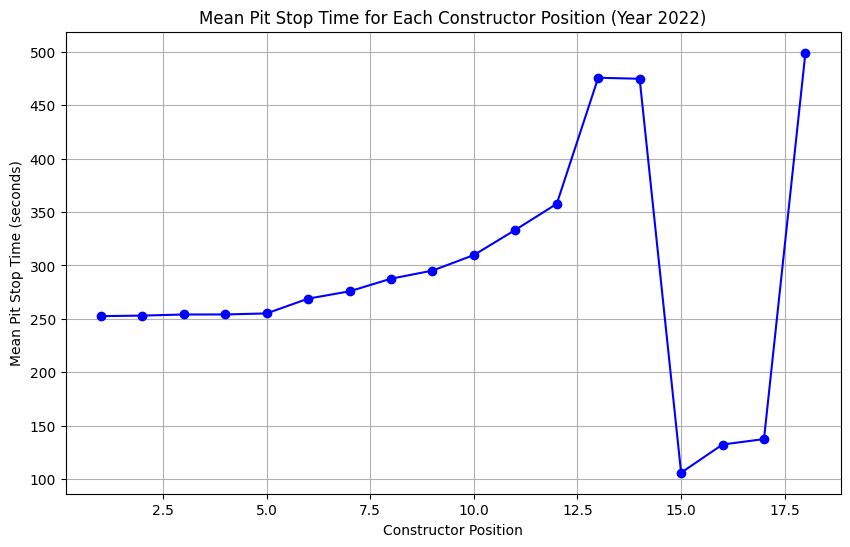

In [48]:
# Merge raceResults with races DataFrame on 'raceId'
merged_data = pd.merge(raceResults, races[['year']], left_on='raceId', right_index=True, how='left')

# Filter data for the year 2022
year_2022_data = merged_data[(merged_data['year'] == 2022) & (merged_data['statusId'] == 1)]

# Group by constructor position and calculate the mean pit stop time in seconds
mean_pitstop_by_position = year_2022_data.groupby('positionOrder')['milliseconds_y'].mean() / 1000

# Plot the correlation
plt.figure(figsize=(10, 6))
plt.plot(mean_pitstop_by_position.index, mean_pitstop_by_position.values, marker='o', linestyle='-', color='blue')
plt.title('Mean Pit Stop Time for Each Constructor Position (Year 2022)')
plt.xlabel('Constructor Position')
plt.ylabel('Mean Pit Stop Time (seconds)')
plt.grid(True)
plt.show()




constructorName
Red Bull          23.951578
Mercedes          24.659684
Ferrari           24.331589
McLaren           24.492936
Aston Martin      24.163307
Williams          24.623120
AlphaTauri        24.601383
Alfa Romeo        24.829607
Alpine F1 Team    23.999500
Haas F1 Team      26.049764
Name: seconds, dtype: float64


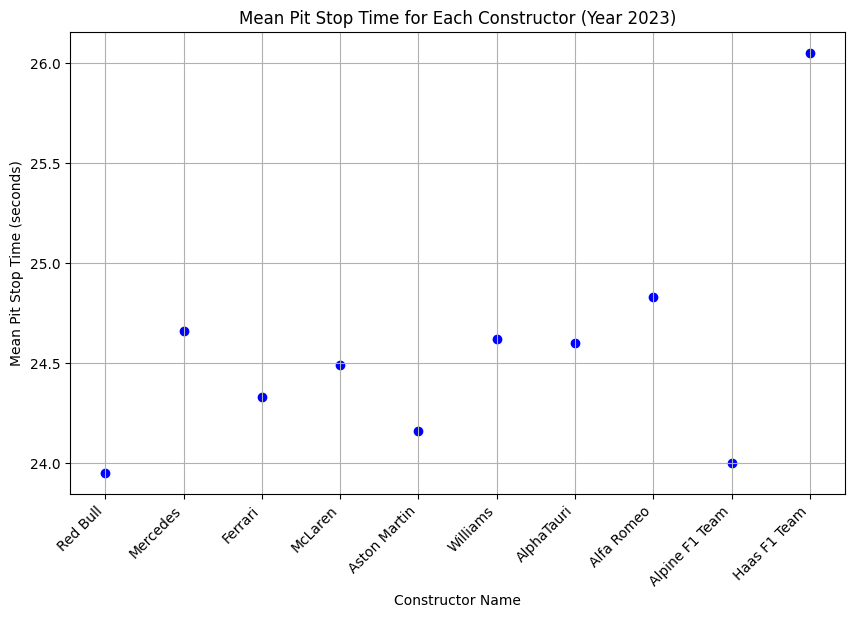

Correlation Coefficient: 0.5392585449326479


In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded the necessary data and defined the 'newPitStops' DataFrame

year = 2022

# Filter data for the year 2023 and where the pit stop time is less than 50 seconds
filtered_data = newPitStops[(newPitStops['seconds'] < 50) & (newPitStops['year'] == year)]

# Group by constructor and calculate the mean pit stop time
mean_pitstop_by_constructor = filtered_data.groupby('constructorName')['seconds'].mean()

# Define a custom sort order for the constructor names based on championship standings
constructor_standings_order = ["Red Bull", "Mercedes", "Ferrari", "McLaren", "Aston Martin", "Williams", "AlphaTauri", "Alfa Romeo", "Alpine F1 Team", "Haas F1 Team"]

# Reorder the DataFrame based on the custom sort order
mean_pitstop_by_constructor = mean_pitstop_by_constructor.reindex(constructor_standings_order)

# Print the sorted DataFrame for reference
print(mean_pitstop_by_constructor)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(mean_pitstop_by_constructor.index, mean_pitstop_by_constructor.values, color='blue')
plt.title('Mean Pit Stop Time for Each Constructor (Year 2023)')
plt.xlabel('Constructor Name')
plt.ylabel('Mean Pit Stop Time (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(mean_pitstop_by_constructor.values, range(len(mean_pitstop_by_constructor)))[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')



constructorName
Red Bull          3.102226
Mercedes          3.021040
Ferrari           3.167843
McLaren           5.010028
Aston Martin      2.395602
Williams          4.804125
AlphaTauri        3.531247
Alfa Romeo        3.558145
Alpine F1 Team    5.484915
Haas F1 Team      4.658854
Name: seconds, dtype: float64


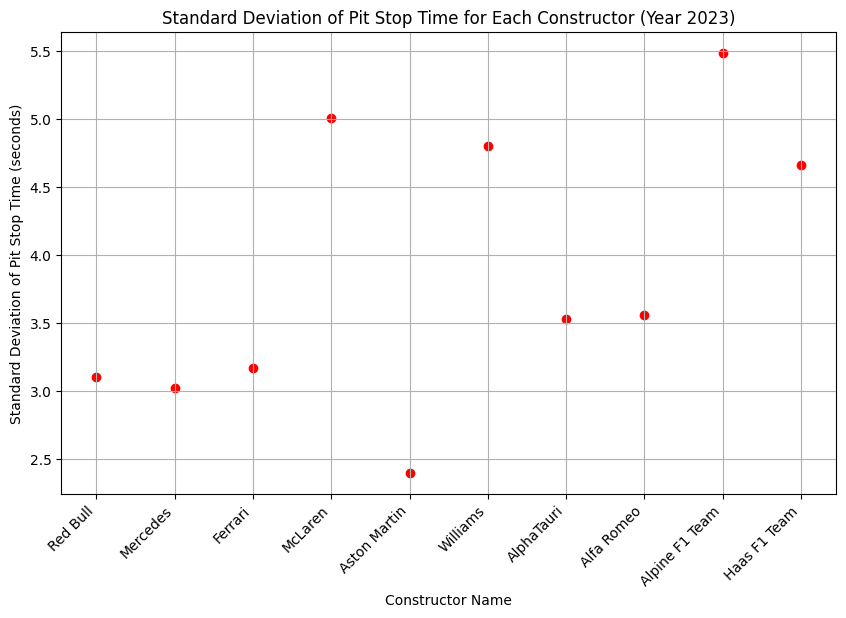

Correlation Coefficient: 0.5542210092326039


In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded the necessary data and defined the 'newPitStops' DataFrame

year = 2023

# Filter data for the year 2023 and where the pit stop time is less than 50 seconds
filtered_data = newPitStops[(newPitStops['seconds'] < 50) & (newPitStops['year'] == year)]

# Group by constructor and calculate the standard deviation of pit stop time
std_dev_pitstop_by_constructor = filtered_data.groupby('constructorName')['seconds'].std()

# Define a custom sort order for the constructor names based on championship standings
constructor_standings_order = ["Red Bull", "Mercedes", "Ferrari", "McLaren", "Aston Martin", "Williams", "AlphaTauri", "Alfa Romeo", "Alpine F1 Team", "Haas F1 Team"]

# Reorder the DataFrame based on the custom sort order
std_dev_pitstop_by_constructor = std_dev_pitstop_by_constructor.reindex(constructor_standings_order)

# Print the sorted DataFrame for reference
print(std_dev_pitstop_by_constructor)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(std_dev_pitstop_by_constructor.index, std_dev_pitstop_by_constructor.values, color='red')
plt.title('Standard Deviation of Pit Stop Time for Each Constructor (Year 2023)')
plt.xlabel('Constructor Name')
plt.ylabel('Standard Deviation of Pit Stop Time (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(std_dev_pitstop_by_constructor, range(len(mean_pitstop_by_constructor)))[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')
